In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('EI_Hotel_Prices.xlsx',parse_dates=True,index_col='Date ')

In [ ]:
df.head()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
2022-06-20,125.10,126.85,120.25,125.10,123.0,122.30,123.01,171.75,100.0,203098,24982281.65,4630
2022-06-21,123.50,127.60,122.55,122.30,126.3,126.15,125.87,171.75,100.0,142935,17990606.75,3597
2022-06-22,123.55,128.30,123.55,126.15,126.3,126.65,126.48,171.75,100.0,156581,19805053.35,8072
2022-06-23,127.00,127.85,124.00,126.65,126.2,125.90,125.76,171.75,100.0,149141,18755907.30,4655
2022-06-24,125.90,129.90,125.05,125.90,125.3,125.45,126.98,171.75,100.0,244282,31018194.60,3588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2022-06-20 to 2024-06-19
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OPEN           496 non-null    float64
 1   HIGH           496 non-null    float64
 2   LOW            496 non-null    float64
 3   PREV. CLOSE    496 non-null    float64
 4   ltp            496 non-null    float64
 5   close          496 non-null    float64
 6   vwap           496 non-null    float64
 7   52W H          496 non-null    float64
 8   52W L          496 non-null    float64
 9   VOLUME         496 non-null    int64  
 10  VALUE          496 non-null    float64
 11  No of trades   496 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 50.4 KB


<Axes: xlabel='Date '>

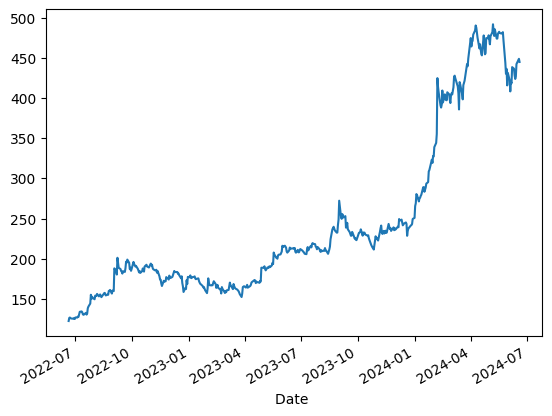

In [ ]:
df['close '].plot()

In [ ]:
len(df)

496

In [ ]:
hotel_close = df['close ']

In [ ]:
hotel_close.reset_index(drop=True,inplace=True)
hotel_close.shape

(496,)

In [ ]:
hotel_close = pd.DataFrame(hotel_close)

In [ ]:
train = hotel_close.iloc[:480]
test = hotel_close.iloc[480:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

#Create model

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
test.shape

(16, 1)

In [ ]:
length = 16
batch_size = 32

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))
#fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other
#during training which curbs the individual power of each neuron leading to over-fitting of training data.
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=10,shuffle=False)

Epoch 1/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 10/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0027


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

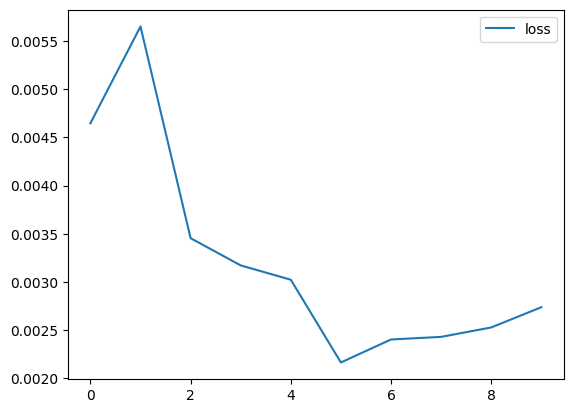

In [ ]:
losses.plot()

#EVALUATING TEST SET :

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch

array([[0.9736344 ],
       [1.        ],
       [0.9770146 ],
       [0.96065441],
       [0.98296376],
       [0.95173067],
       [0.95186587],
       [0.96795565],
       [0.97174148],
       [0.97471606],
       [0.9703894 ],
       [0.96863169],
       [0.96998378],
       [0.97349919],
       [0.94551109],
       [0.86979448]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
first_eval_batch

array([[[0.9736344 ],
        [1.        ],
        [0.9770146 ],
        [0.96065441],
        [0.98296376],
        [0.95173067],
        [0.95186587],
        [0.96795565],
        [0.97174148],
        [0.97471606],
        [0.9703894 ],
        [0.96863169],
        [0.96998378],
        [0.97349919],
        [0.94551109],
        [0.86979448]]])

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 184ms/step


array([[0.91994816]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.83355868])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
test_predictions

[array([0.91994816], dtype=float32),
 array([0.92631394], dtype=float32),
 array([0.90581745], dtype=float32),
 array([0.92002076], dtype=float32),
 array([0.9266136], dtype=float32),
 array([0.92547315], dtype=float32),
 array([0.91996425], dtype=float32),
 array([0.92315096], dtype=float32),
 array([0.9120167], dtype=float32),
 array([0.92866045], dtype=float32),
 array([0.94232774], dtype=float32),
 array([0.9277656], dtype=float32),
 array([0.93669486], dtype=float32),
 array([0.9534109], dtype=float32),
 array([0.95175797], dtype=float32),
 array([0.93689615], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[462.49682981],
       [464.8508938 ],
       [457.27129267],
       [462.52367672],
       [464.96171995],
       [464.5399722 ],
       [462.50278109],
       [463.68122376],
       [459.56377188],
       [465.71863528],
       [470.77279744],
       [465.38772178],
       [468.6897594 ],
       [474.8713595 ],
       [474.26009637],
       [468.76419455]])

In [ ]:
test.loc[:,'predictions'] = true_predictions

In [ ]:
test

,close,predictions
480,430.55,462.496830
481,436.55,464.850894
482,415.95,457.271293
483,431.60,462.523677
484,422.25,464.961720
485,408.45,464.539972
486,420.90,462.502781
487,418.50,463.681224
488,438.70,459.563772
489,436.75,465.718635


<Axes: >

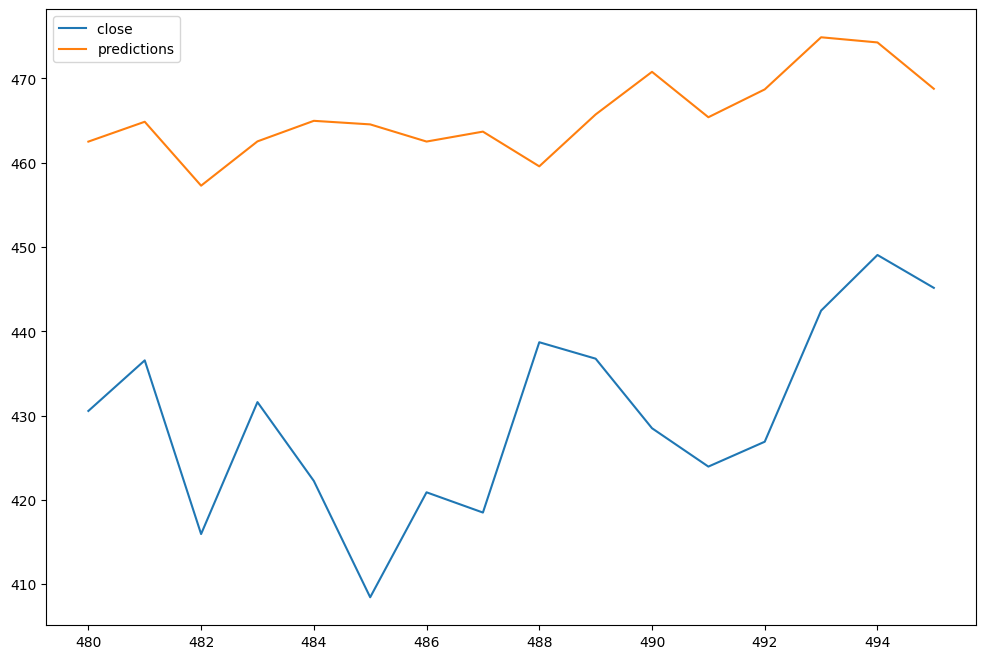

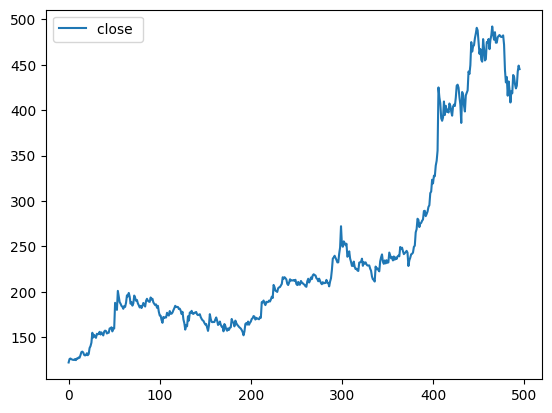

In [ ]:
test.plot(figsize=(12,8))
hotel_close.plot()

#Full Model

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(hotel_close)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length = length, batch_size=32)

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


<ipython-input-109-b5005ef83afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


15/15 [==============================] - 2s 5ms/step - loss: 0.1069
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0425
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0318
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0273
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0215
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0119
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0063


<Axes: >

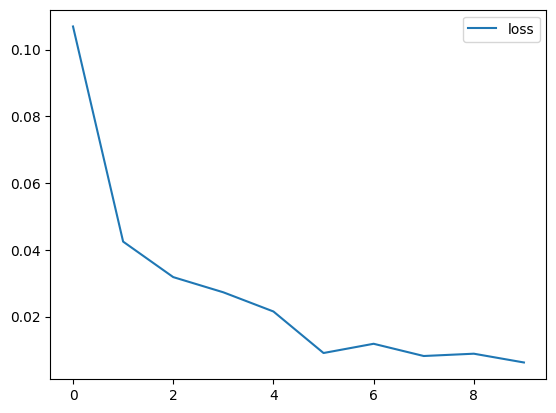

In [ ]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,1))

for i in range(20):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[462.55748883],
       [463.19006639],
       [451.15500242],
       [448.26485987],
       [457.45300525],
       [447.85382442],
       [443.36064806],
       [449.73301992],
       [441.03704584],
       [436.60217003],
       [445.54900181],
       [444.37150694],
       [429.35460654],
       [445.22207787],
       [444.68628585],
       [425.76338054],
       [435.28680371],
       [444.00451101],
       [429.35509146],
       [426.27735118]])

In [ ]:
forecast.flatten()

array([462.55748883, 463.19006639, 451.15500242, 448.26485987,
       457.45300525, 447.85382442, 443.36064806, 449.73301992,
       441.03704584, 436.60217003, 445.54900181, 444.37150694,
       429.35460654, 445.22207787, 444.68628585, 425.76338054,
       435.28680371, 444.00451101, 429.35509146, 426.27735118])

In [ ]:
df_array = np.array(hotel_close)
df_array

array([[122.3 ],
       [126.15],
       [126.65],
       [125.9 ],
       [125.45],
       [125.15],
       [125.15],
       [126.05],
       [124.9 ],
       [126.7 ],
       [126.6 ],
       [127.8 ],
       [127.5 ],
       [130.4 ],
       [133.75],
       [134.25],
       [133.3 ],
       [130.65],
       [130.05],
       [130.5 ],
       [132.45],
       [130.3 ],
       [131.6 ],
       [138.2 ],
       [140.25],
       [144.1 ],
       [155.  ],
       [149.8 ],
       [152.6 ],
       [151.15],
       [149.4 ],
       [153.9 ],
       [153.35],
       [153.7 ],
       [156.05],
       [153.05],
       [155.4 ],
       [153.6 ],
       [152.05],
       [156.2 ],
       [157.35],
       [156.9 ],
       [154.2 ],
       [155.05],
       [155.  ],
       [159.75],
       [160.  ],
       [161.  ],
       [156.5 ],
       [160.3 ],
       [159.6 ],
       [187.95],
       [184.15],
       [180.2 ],
       [201.1 ],
       [195.05],
       [188.7 ],
       [187.  ],
       [184.6 

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

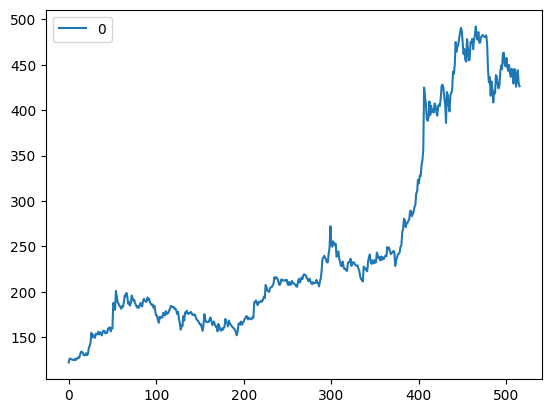

In [ ]:
full_data.plot()